In [37]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [45]:
train_dataset = dsets.MNIST(root="./data",
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

In [46]:
len(train_dataset)

60000

2


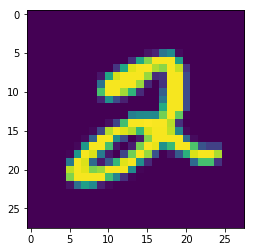

In [47]:
show_img = train_dataset.train_data[5].numpy().reshape(28,28)
label = train_dataset.train_labels[5]
print(label)
plt.imshow(show_img)


In [119]:
test_dataset = dsets.MNIST("./data",
                          train=False,
                          transform = transforms.ToTensor(),
                          download=True)

In [120]:
len(test_dataset)

10000

9


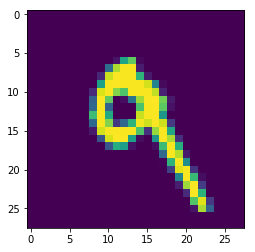

In [172]:
show_img = test_dataset.test_data[7].numpy().reshape(28,28)
label = test_dataset.test_labels[7]
print(label)
plt.imshow(show_img)


In [56]:
test_dataset.test_data[1].size()

torch.Size([28, 28])

In [123]:
batch_size=100
n_iters=3000
num_epochs = n_iters / (len(train_dataset)/batch_size)
print(num_epochs)

5.0


In [124]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size = batch_size,
                                          shuffle=True)


test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size = batch_size,
                                          shuffle=True)

In [125]:
import collections

In [126]:
isinstance(train_loader, collections.Iterable)

True

In [127]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out
        

In [128]:
input_dim = 28*28
output_dim = 10
model = LogisticRegressionModel(input_dim, output_dim)

In [129]:
criterion = nn.CrossEntropyLoss()

In [130]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [131]:
print(list(model.parameters())[0].size())
print(list(model.parameters())[1].size())

torch.Size([10, 784])
torch.Size([10])


In [163]:
iter = 0
for epoch in range(int(num_epochs)):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        optimizer.zero_grad()
        
        
        outputs = model(images)
        
        loss = criterion(outputs, labels)
              
        loss.backward()
        optimizer.step()
              
        
        iter = iter + 1
        if (iter % 500 ==0):
              correct = 0.0
              total = 0.0 
              for i, (images, labels) in enumerate(test_loader):
                  images = Variable(images.view(-1, 28*28))
                  outputs = model(images)
                  labels2 = Variable(labels)
                  _, predicted = torch.max(outputs, 1)
                  total += labels.size(0) 
                  correct += (predicted.data == labels).sum()
                  
              if(iter==500):
                    print("this is iteration 500")
                    print(outputs[0,:])
              #print("Correct: {} ".format(correct))
              #print("Total: {}".format(total))
              accuracy = 100.0 * correct*1.0/(1.0*total)
              print("Iteration:{}, Loss:{},accuracy:{}".format(iter, loss.data, accuracy) )
                
                    
        
        
        
        
        

this is iteration 500
Variable containing:
-1.3751
-2.7327
-1.2083
-4.0593
 6.5169
-1.6309
 0.4034
 0.6861
 0.3140
 2.8485
[torch.FloatTensor of size 10]

Iteration:500, Loss:
 0.5305
[torch.FloatTensor of size 1]
,accuracy:89.83
Iteration:1000, Loss:
 0.3515
[torch.FloatTensor of size 1]
,accuracy:89.84
Iteration:1500, Loss:
 0.4143
[torch.FloatTensor of size 1]
,accuracy:89.87
Iteration:2000, Loss:
 0.3621
[torch.FloatTensor of size 1]
,accuracy:89.9
Iteration:2500, Loss:
 0.5099
[torch.FloatTensor of size 1]
,accuracy:89.87
Iteration:3000, Loss:
 0.3810
[torch.FloatTensor of size 1]
,accuracy:89.89


OUTPUTS
torch.Size([100, 10])
Variable containing:
-1.0865
-3.9861
 0.7073
-0.4841
 1.3928
 2.0924
 5.5466
-4.4300
 0.9984
-0.3656
[torch.FloatTensor of size 10]

PREDICTED
6
LABELS
6


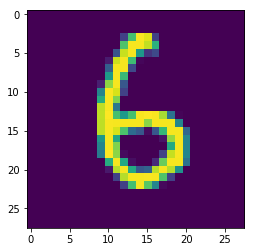

In [221]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size = batch_size,
                                          shuffle=False)

image_num=21
iter_test=0
for i, (images, labels) in enumerate(test_loader):
     iter_test+=1
     
     images = Variable(images.view(-1, 28*28))
     
     outputs = model(images)
     plt.imshow(images.data[image_num].numpy().reshape(28,28))
     labels2 = Variable(labels)
     _, predicted = torch.max(outputs, 1)
     if(iter_test==1):
        print("OUTPUTS")
        print(outputs.size())
        
        print(outputs[image_num,:])
        _, predicted = torch.max(outputs.data,1)
        print("PREDICTED")
        print(predicted[image_num])
        print("LABELS")
        print(labels[image_num])
        break
        
    

In [ ]:

\